In [1]:
#header file declaraction
import pickle#make a dummy file
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
import numpy as np


In [2]:
#reading the two datasets for heart and diabetes
dh=pd.read_csv("heart.csv")
dd=pd.read_csv("diabetes.csv")

In [ ]:
print(dh.head())

In [ ]:
print(dd.head())

In [7]:
#feature selection for heart
di=dh[["male","age","currentSmoker","cigsPerDay","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","heartRate","glucose"]]
do=dh.iloc[:,-1]
#featuire selection for diabetes
ddi=dd.iloc[:,1:-1]
ddo=dd.iloc[:,-1]

Text(0,0.5,'number')

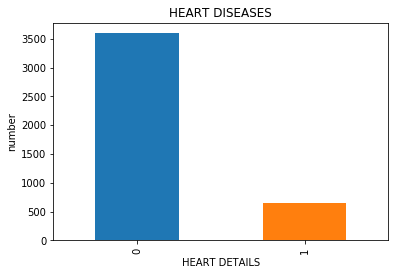

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
num=pd.value_counts(dh['TenYearCHD'],sort=True).sort_index()
num.plot(kind='bar')
plt.title("HEART DISEASES")
plt.xlabel('HEART DETAILS')
plt.ylabel('number')

Text(0,0.5,'number')

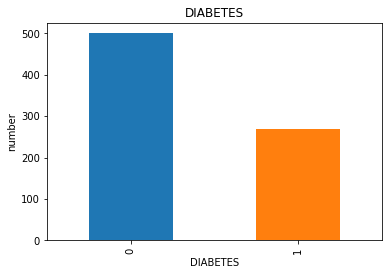

In [11]:
import matplotlib.pyplot as  plt
#num=pd.value_counts
num=pd.value_counts(dd['Outcome'],sort=True).sort_index()
num.plot(kind='bar')
plt.title("DIABETES")
plt.xlabel('DIABETES')
plt.ylabel('number')

In [12]:
print(dh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


In [13]:
print(dd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#thus heart module contains null values
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
#da=di.fillna(1,inplace=True)

da=LabelEncoder()

di["cigsPerDay"]=da.fit_transform(di[["cigsPerDay"]])
di["totChol"]=da.fit_transform(di[["totChol"]])
di["heartRate"]=da.fit_transform(di[["heartRate"]])
di["glucose"]=da.fit_transform(di[["glucose"]])

In [15]:
print(di.isnull().sum())
print(do.isnull().sum())
print(ddi.isnull().sum())
print(ddo.isnull().sum())

0

In [16]:
#for heart dieases training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(di,do,test_size=0.2)

#for diabetes
x1_train,x1_test,y1_train,y1_test=train_test_split(ddi,ddo,test_size=0.2)


In [17]:
import warnings 
warnings.filterwarnings('ignore')
#for heart diseases
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.predict(x_test)
print(lg.score(x_test,y_test))


#for diabets

from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()
lg1.fit(x1_train,y1_train)
lg1.predict(x1_test)
print(lg1.score(x1_test,y1_test))




0.7727272727272727

In [18]:
#for heart diseases
from sklearn.ensemble import AdaBoostClassifier
a=AdaBoostClassifier()
a.fit(x_train,y_train)
a.predict(x_test)
f=a.score(x_test,y_test)
print("heart AB Score:",f)

#for diabets

from sklearn.ensemble import AdaBoostClassifier
a1=AdaBoostClassifier()
a1.fit(x1_train,y1_train)
a1.predict(x1_test)
s=a1.score(x1_test,y1_test)
print("Diabetes AB Score:",s)


heart AB Score: 0.8573113207547169
Diabetes AB Score: 0.7337662337662337


In [19]:
#for heart diseases
from sklearn.ensemble import RandomForestClassifier
lg=RandomForestClassifier()
lg.fit(x_train,y_train)
lg.predict(x_test)
t=lg.score(x_test,y_test)
print("heart RF Score:",t)

#for diabets

from sklearn.ensemble import RandomForestClassifier
lg1=RandomForestClassifier()
lg1.fit(x1_train,y1_train)
lg1.predict(x1_test)
r=lg1.score(x1_test,y1_test)
print("Diabetes  Score:",r)


heart RF Score: 0.8561320754716981
Diabetes  Score: 0.7207792207792207


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.22077922, 0.32077922, 0.42077922, 0.52077922, 0.62077922,
        0.72077922, 0.82077922, 0.92077922, 1.02077922, 1.12077922,
        1.22077922]),
 <a list of 10 Patch objects>)

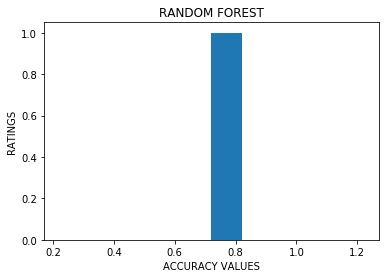

In [20]:
import matplotlib.pyplot as plt
plt.title("RANDOM FOREST")
plt.xlabel('ACCURACY VALUES')
plt.ylabel('RATINGS')
plt.hist(r)

heart SVC Score: 0.8561320754716981
Diabetes SVC Score: 0.7532467532467533


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.25324675, 0.35324675, 0.45324675, 0.55324675, 0.65324675,
        0.75324675, 0.85324675, 0.95324675, 1.05324675, 1.15324675,
        1.25324675]),
 <a list of 10 Patch objects>)

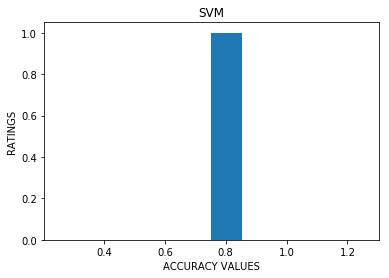

In [21]:
#for heart diseases
from sklearn.svm import SVC
a=SVC()
a.fit(x_train,y_train)
a.predict(x_test)
f=a.score(x_test,y_test)
print("heart SVC Score:",f)

#for diabets
from sklearn.svm import SVC
a1=SVC()
a1.fit(x1_train,y1_train)
a1.predict(x1_test)
s=a1.score(x1_test,y1_test)
print("Diabetes SVC Score:",s)

import matplotlib.pyplot as plt
plt.title("SVM")
plt.xlabel('ACCURACY VALUES')
plt.ylabel('RATINGS')

plt.hist(s)


In [22]:
with open("heartnew.pickle","wb") as f:
    pickle.dump(lg,f)
with open("diabetesnew.pickle","wb") as g:
    pickle.dump(lg1,g)

In [23]:
#print(ddi.head())

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
6,78,50,32,88,31.0,0.248,26
7,115,0,0,0,35.3,0.134,29
8,197,70,45,543,30.5,0.158,53
9,125,96,0,0,0.0,0.232,54


In [ ]:
#print(di.head())